In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [ ]:
def train_model():
    
    DESIRED_ACCURACY=0.96
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('accuracy') > DESIRED_ACCURACY:
                self.model.stop_training=True
    callbacks=myCallback()
    
    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(5,activation='softmax')
    ])
    
    model.summary()
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    train_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory(
        "dogs_img",
        target_size=(150,150),
        batch_size=16,
        class_mode="categorical"
    )
    
    validation_datagen = ImageDataGenerator(rescale=1/255)
    validation_generator = train_datagen.flow_from_directory(
        "dogs_valid",
        target_size=(150,150),
        batch_size=8,
        class_mode="categorical"
    )

    history=model.fit(
        train_generator,
        steps_per_epoch=35,
        epochs=20,
        verbose=1,
        validation_data=validation_generator,
        validation_steps=6,
        callbacks=[callbacks]
    )
    
    
    return history
    

In [ ]:
train_model()

In [3]:
def inception_train_model():
    
    DESIRED_ACCURACY=0.95
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('accuracy') > DESIRED_ACCURACY:
                print('Reach {}% accuracy stop training'.format(DESIRED_ACCURACY*100))
                self.model.stop_training=True
    callbacks=myCallback()
    
    
    path_inception='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
    from tensorflow.keras.applications.inception_v3 import InceptionV3
    pre_trained_model=InceptionV3(input_shape=(150,150,3),
                                  include_top=False,
                                  weights=None)
    # load weights in h5 file into inception model
    pre_trained_model.load_weights(path_inception)
    for layer in pre_trained_model.layers:
        layer.trainable=False
        
    # pre_trained_model.summary()
    last_layer=pre_trained_model.get_layer('mixed7')
    x=last_layer.output
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(512,activation='relu')(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    x=tf.keras.layers.Dense(5,activation='softmax')(x)
    model=tf.keras.Model(pre_trained_model.input,x)
    
    
    from tensorflow.keras.optimizers import RMSprop
    
    
    model.compile(optimizer=RMSprop(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    
    model.summary()
    
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    train_datagen = ImageDataGenerator(horizontal_flip=True,
                                       width_shift_range=0.15,
                                       height_shift_range=0.15,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       fill_mode='nearest',
                                       rescale=1./255)
    
    validation_datagen = ImageDataGenerator(horizontal_flip=True,
                                       width_shift_range=0.15,
                                       height_shift_range=0.15,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       fill_mode='nearest',
                                       rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(
        "dogs_img",
        target_size=(150,150),
        batch_size=16,
        class_mode="categorical"
    )
    validation_generator = train_datagen.flow_from_directory(
        "dogs_valid",
        target_size=(150,150),
        batch_size=8,
        class_mode="categorical"
    )

    history=model.fit(
        train_generator,
        epochs=20,
        verbose=1,
        validation_data=validation_generator,
        callbacks=[callbacks]
    )
    
    model.save('ai_classification_with_inceptionv3.h5')
    return history
    

In [4]:
history = inception_train_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

Epoch 1/20
36/36 [==============================] - 46s 1s/step - loss: 0.9091 - accuracy: 0.6620 - val_loss: 0.3226 - val_accuracy: 0.8600
Epoch 2/20
36/36 [==============================] - 44s 1s/step - loss: 0.3299 - accuracy: 0.8862 - val_loss: 0.2361 - val_accuracy: 0.9000
Epoch 3/20
36/36 [==============================] - 44s 1s/step - loss: 0.2701 - accuracy: 0.9177 - val_loss: 0.2728 - val_accuracy: 0.8600
Epoch 4/20
36/36 [==============================] - 45s 1s/step - loss: 0.1507 - accuracy: 0.9440 - val_loss: 0.1452 - val_accuracy: 0.9400
Epoch 5/20
36/36 [==============================] - 44s 1s/step - loss: 0.1739 - accuracy: 0.9440 - val_loss: 0.2341 - val_accuracy: 0.9200
Epoch 6/20
36/36 [==============================] - 45s 1s/step - loss: 0.1871 - accuracy: 0.9282 - val_loss: 0.1087 - val_accuracy: 0.9800
Epoch 7/20
36/36 [==============================] - 45s 1s/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 0.2275 - val_accuracy: 0.9400


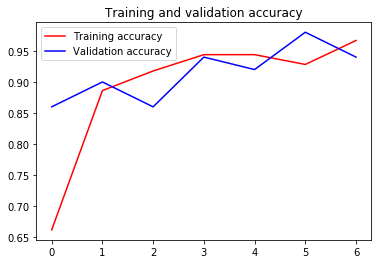

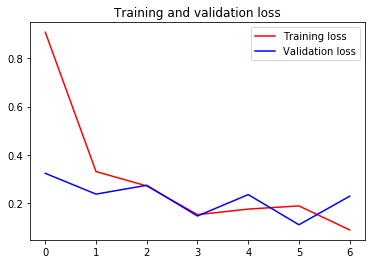

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))


plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('ai_classification_with_inceptionv3.h5')
path='ai_1.jpg'
#path='dogs_valid/luna/301595444781_.pic.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)/255

images = np.vstack([x])

pred = model.predict(images)


classes=['ai','blar','eevee','loki','luna']
classes.sort()

index=np.argmax(pred[0])
print(classes[index])

ai


In [27]:
print(pred)

[[9.9999988e-01 1.0616837e-08 9.9812503e-08 3.3425172e-11 7.0788295e-09]]
